# ••**Clausrum Neurones Simulations**••

Neurones Subtypes 




In [1]:
from brian2 import *
import matplotlib.pyplot as plt




In [2]:
# PN1 -- Variation 1


parameters = {
    "c_m": 200 * pF,
    "g_l": (1/246.92) * nS,   # VAriable
    "e_l": -73.54 * mV,    # VAriable
    "v_t": -35.6 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-73.54-5) * mV,  # VAriable
    "i_stim": (117.34*2) * pA,  # VAriable
}


In [3]:
parameters = {
    "c_m": 210 * pF,
    "g_l": (1/246.92) * nS,   # VAriable
    "e_l": -73.54 * mV,    # VAriable
    "v_t": -35.7 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-73.54-5) * mV,  # VAriable
    "i_stim": (117.34*2) * pA,  # VAriable
}

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


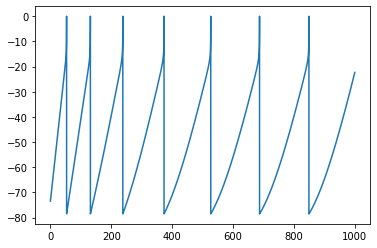

<Figure size 720x360 with 0 Axes>

In [4]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > 0*mV", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(1 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('adaptation')

plt.show()


PN2


In [5]:
# PN1 -- Variation 1


parameters = {
    "c_m": 200 * pF,
    "g_l": (1/173) * nS,   # VAriable
    "e_l": -74.5 * mV,    # VAriable
    "v_t": -35.7 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-73.54-5) * mV,  # VAriable
    "i_stim": (216*2) * pA,  # VAriable
}


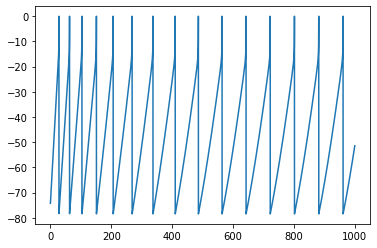

<Figure size 720x360 with 0 Axes>

In [6]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > 0*mV", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(1 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('adaptation')

plt.show()